## Python code

In [6]:
                                                                                                                                                                                                            # %load jg_04_visualize_distance.py


# In[1]:



# JG_ADD
#import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
from matplotlib.pyplot import plot as plt



#get_ipython().magic(u'matplotlib inline')


import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('gradient_data/src/')
from viz import *

import surfdist as sd
from surfdist import viz, load, utils, surfdist

/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/nibabel/cifti2/parse_cifti2.py:24: FutureWarning: We no longer carry a copy of the 'six' package in nibabel; Please import the 'six' package directly
  from ..externals.six import BytesIO
/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [7]:
# In[2]:


def imageCrop(filename):

    from PIL import Image

    i1 = Image.open(filename)
    i2 = np.array(i1)
    i2[i2.sum(axis=2) == 255*4,:] = 0
    i3 = i2.sum(axis=2)
    x = np.where((i3.sum(axis=1) != 0) * 1)[0]
    y = np.where((i3.sum(axis=0) != 0) * 1)[0]

    result = Image.fromarray(i2[x.squeeze()][:,y.squeeze()])
    result.save(filename)

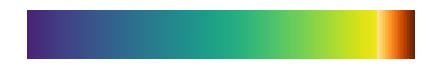

In [8]:
# In[3]:


import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('nipy_spectral')
new_cmap = truncate_colormap(cmap, 0.2, 0.95)

#colors1 = plt.cm.YlGnBu(np.linspace(0, 1, 128))
first = int((128*2)-np.round(255*(1.-0.90)))
second = (256-first)
#colors2 = new_cmap(np.linspace(0, 1, first))
colors2 = plt.cm.viridis(np.linspace(0.1, .98, first))
colors3 = plt.cm.YlOrBr(np.linspace(0.25, 1, second))
colors4 = plt.cm.PuBu(np.linspace(0., 0.5, second))
#colors4 = plt.cm.pink(np.linspace(0.9, 1., second))
# combine them and build a new colormap
cols = np.vstack((colors2,colors3))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

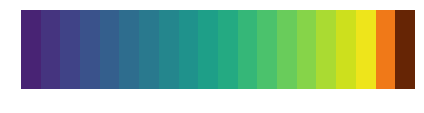

In [9]:
# In[18]:


num = 20
gradient = range(num)
for x in range(2):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

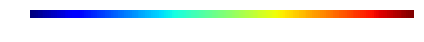

In [10]:
# In[10]:


num = 200
gradient = range(num)
for x in range(2):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap='jet', interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

In [11]:
# # Geodesic distance from gradient peaks

# In[3]:


import h5py, sys, io, numpy as np
import nibabel as nib 

surfmL = nib.freesurfer.read_geometry('gradient_data/templates/S900.L.midthickness_MSMAll.32k_fs_LR.surf')
surfiL = nib.freesurfer.read_geometry('gradient_data/templates/S900.L.very_inflated_MSMAll.32k_fs_LR.surf')
surfL = []
surfL.append(np.array(surfmL[0]*0.3 + surfiL[0]*0.7))
surfL.append(surfmL[1])

surfmR = nib.freesurfer.read_geometry('gradient_data/templates/S900.R.midthickness_MSMAll.32k_fs_LR.surf')
surfiR = nib.freesurfer.read_geometry('gradient_data/templates/S900.R.very_inflated_MSMAll.32k_fs_LR.surf')
surfR = []
surfR.append(np.array(surfmR[0]*0.3 + surfiR[0]*0.7))
surfR.append(surfmR[1])

#sulcL = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[0:32492]
sulcL = -1 * np.squeeze(nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').dataobj)[0:32492] # JG_MOD


#sulcR = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[32492:32492*2]
sulcR = -1 * np.squeeze(nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').dataobj)[32492:32492*2] # JG_MOD




#res = nib.load('gradient_data/templates/hcp.tmp.lh.dscalar.nii').data
res = np.squeeze(nib.load('gradient_data/templates/hcp.tmp.lh.dscalar.nii').dataobj[:]) # JG_MOD

#cortL = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))
cortL = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))

#res = nib.load('gradient_data/templates/hcp.tmp.rh.dscalar.nii').data
res = np.squeeze(nib.load('gradient_data/templates/hcp.tmp.rh.dscalar.nii').dataobj[:]) # JG_MOD
cortR = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))

cortLen = len(cortL) + len(cortR)
del res

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [12]:
# In[4]:


surffL = nib.freesurfer.read_geometry('gradient_data/templates/S900.L.flat.32k_fs_LR.surf')
surffR = nib.freesurfer.read_geometry('gradient_data/templates/S900.R.flat.32k_fs_LR.surf')

In [13]:
# In[5]:


sns.set(style="white", color_codes=True)

def doDist(points, surf, cort, sulc, plotDist=None, zones=None, plots=None, output_file=None, showall=None):
    if len(np.shape(points)) > 1:
        dist = surfdist.dist_calc(surf, np.squeeze(cort), [np.concatenate(points)])
    else:
        dist = surfdist.dist_calc(surf, np.squeeze(cort), points)
    count=0
    #if plotDist:
    if plots is not None: # JG_MOD
        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, mask=cort, bg_on_stat=True, stat_map=(dist-dist.mean()) * -1, azim=0, alpha=1, symmetric_cbar=None)
        plt.show()
        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1
        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, mask=cort, bg_on_stat=True, stat_map=(dist-dist.mean()) * -1, azim=180, alpha=1, symmetric_cbar=None)
        # plt.show()    # JG_MOD
        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1
        plt.close() # JG_MOD

    if zones:
        dist_vals = np.zeros((len(points), len(surf[0])))
        for n, p in enumerate(points):    
            dist_vals[n, :] = surfdist.dist_calc(surf, np.squeeze(cort), [p])
            print n
        zone = (np.argsort(dist_vals, axis=0)[0, :] + 1.) / len(points)
        zone = zone - np.mean(zone)
        
        aZ = []
        z0 = zone[surfR[1]][:,0]
        z1 = zone[surfR[1]][:,1]
        z2 = zone[surfR[1]][:,2]

        for n,i in enumerate(z0):
            if i != z1[n]:
                aZ.append(surfR[1][n])
            if i != z2[n]:
                aZ.append(surfR[1][n])
            if z1[n] != z2[n]:
                aZ.append(surfR[1][n])

        aZ = np.unique(aZ)
        
        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=0, lenient=True)
      
        #plt.show()  # JG_MOD

        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1

        plt.close() # JG_ADD


        f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=180, lenient=True)
        
        #plt.show()  # JG_MOD

        if output_file:            
            f.savefig(('Fig.%s' % str(count)) + output_file)
            count =+ 1

        plt.close() # JG_ADD

        if showall:
            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=90, lenient=True)
            #plt.show() # JG_MOD
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1

            plt.close() # JG_ADD

            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, azim=270, lenient=True)
            #plt.show() # JG_MOD
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1

            plt.close() # JG_ADD

            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, elev=90, lenient=True)
            #plt.show() # JG_MOD
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1

            plt.close() # JG_ADD

            f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist-dist.mean(), mask=np.setdiff1d(cort, aZ), bg_on_stat=True, elev=270, lenient=True)
            #plt.show() # JG_MOD
            if output_file:            
                f.savefig(('Fig.%s' % str(count)) + output_file)
                count =+ 1
            
            plt.close() # JG_ADD

    # JG_MOD
    #if Plots != None:

    if plots is not None: 
        incld = np.where(dist[cort] != 0)[0]
        comp = {'dist':dist[cort][incld], 'embed':plots[incld]}
        g = sns.jointplot(x='dist', y='embed', data=comp, kind="hex").set_axis_labels("dist", "gradient")
        if output_file:            
            g.savefig(('Fig.%s' % str(count)) + output_file + '.pdf')
            count =+ 1

    
            
    return dist

In [14]:
def rmPoints(pts, rmPts):
    pts = list(pts)
    pts.remove(rmPts)
    pts = np.squeeze(np.array(pts, dtype=np.int32))
    return pts

def getClusts(surf,cort,thr, embVals, side='Top'):

    import networkx as nx
    from scipy import stats
    
    thr = np.percentile(embVals,thr)
    # binned = stats.rankdata(embVals, "average")/len(cort)
    data = np.zeros(len(surf[0]))
    data[cort] = embVals
    
    G=nx.Graph()
    G.add_nodes_from(range(len(surf[0])))
    G.add_edges_from(surf[1][:,[0,1]])
    G.add_edges_from(surf[1][:,[0,2]])
    G.add_edges_from(surf[1][:,[1,2]])

    if side == 'Top':
        clustgraph = nx.subgraph(G, np.where(data >= thr)[0])
    if side == 'Bottom':
        clustgraph = nx.subgraph(G, np.where(data <= thr)[0])        
        
    subclust = sorted(nx.connected_components(clustgraph), key = len, reverse=True)

    subclust2 = []
    for n, p in enumerate(subclust):
        subclust2.append(np.array(list(p)))
    print len(subclust2)

    return subclust2

In [15]:
# In[6]:


# Load embedding results
emb = np.load('gradient_data/embedded/embedding_dense_emb.npy')

dataL = np.zeros((len(surfL[0]), emb.shape[1]))
dataL[cortL,:] = emb[0:len(cortL),:]
dataR = np.zeros((len(surfR[0]), emb.shape[1]))
dataR[cortR,:] = emb[len(cortL):cortLen,:]

In [16]:
# In[33]:


# distance based on peaks:

for perc in [70, 75, 80, 85, 90, 95]:

    print perc
    
    clusts = getClusts(surfL,cortL,perc, emb[:len(cortL),0])

    d = np.zeros(len(surfL[0])) - len(clusts) - 5
    e = np.zeros(len(surfL[0]))
    e[cortL] = emb[:len(cortL),0]
    for i in range(len(clusts)):
        d[clusts[i]] = i + 1
        d[clusts[i][np.argmax(e[clusts[i]])]] = len(clusts) + 5

    pts = np.where(d == len(clusts) + 5)[0]
    distL = surfdist.dist_calc(surfL, np.squeeze(cortL), pts)
    di = distL.copy()
    showSurf((di - np.mean(di)) * -1, surfL, sulcL, np.setdiff1d(cortL, np.where(di == 0)[0]), 
             output_file='gradient_data/figures/dist.%sperc.pts.png' % perc)

70
10
75
8
80
6
85
10
90
9
95
12


In [17]:
# In[7]:


ptsL = [21035, 29566, 30472, 11552, 21737, 16444, 13370, 26464]
ptsR = [21034, 29346, 30556, 11533, 21684, 16346, 13332, 26409]
names = ['medial frontal', 'dorsomedial frontal', 'dorsolateral frontal', 
         'ventrolateral frontal', 'lateral temporal', 'inferior parietal', 
         'posteromedial', 'medial temporal']
d = np.abs(np.abs(np.array(surfmL[0][ptsL,:]))-np.abs(np.array(surfmR[0][ptsR,:])))
for n,i in enumerate(d):
    print names[n] + '\t\t %f' % np.sqrt(i[0]**2 + i[1]**2 + i[2]**2)

medial frontal		 2.361335
dorsomedial frontal		 6.952844
dorsolateral frontal		 7.467428
ventrolateral frontal		 1.337740
lateral temporal		 5.977212
inferior parietal		 6.997158
posteromedial		 5.766131
medial temporal		 5.111823


In [18]:
# In[8]:

print 'in[8]'

distL = surfdist.dist_calc(surfmL, np.squeeze(cortL), ptsL)
di = distL.copy()
mask = np.setdiff1d(cortL, np.where(di == 0)[0])
di1 = di.copy()
di1[mask] = (di1[mask] - np.mean(di1[mask])) * -1
showSurf(di1, surfiL, sulcL, mask, output_file='gradient_data/figures/embedded/fig.hcp.dist.L', symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
zoneL = surfdist.zone_calc(surfmL, np.squeeze(cortL), ptsL)
# showSurf(zoneL, surfiL, sulcL, mask, output_file='gradient_data/figures/embedded/fig.hcp.zone.L', symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)

in[8]


In [19]:
# In[9]:

print 'in[9]'

distR = surfdist.dist_calc(surfmL, np.squeeze(cortR), ptsR)
di = distR.copy()
mask = np.setdiff1d(cortR, np.where(di == 0)[0])
di1 = di.copy()
di1[mask] = (di1[mask] - np.mean(di1[mask])) * -1
showSurf(di1, surfiR, sulcR, mask, output_file='gradient_data/figures/embedded/fig.hcp.dist.R', symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
zoneR = surfdist.zone_calc(surfmR, np.squeeze(cortR), ptsR)
showSurf(zoneR, surfiR, sulcR, mask)

in[9]


In [20]:
# In[10]:

print 'in[10]'


print np.max(distL)
print np.min(distL)
print np.max(distR)
print np.min(distR)

in[10]
83.7555288127
0.0
80.8957523937
0.0


In [21]:
# In[11]:


aR = []
z0 = zoneR[surfR[1]][:,0]
z1 = zoneR[surfR[1]][:,1]
z2 = zoneR[surfR[1]][:,2]

for n,i in enumerate(z0):
    if i != z1[n]:
        aR.append(surfR[1][n])
    if i != z2[n]:
        aR.append(surfR[1][n])
    if z1[n] != z2[n]:
        aR.append(surfR[1][n])
aR = np.unique(aR)

aL = []
z0 = zoneL[surfL[1]][:,0]
z1 = zoneL[surfL[1]][:,1]
z2 = zoneL[surfL[1]][:,2]

for n,i in enumerate(z0):
    if i != z1[n]:
        aL.append(surfL[1][n])
    if i != z2[n]:
        aL.append(surfL[1][n])
    if z1[n] != z2[n]:
        aL.append(surfL[1][n])
aL = np.unique(aL)

# Right:
f = plot_surf_stat_map(surfiR[0], surfiR[1], bg_map=sulcR, stat_map=(distR - distR[cortR].mean()) * -1, alpha=1, lenient=True,
                        mask=np.setdiff1d(cortR, np.concatenate((aR, ptsR))), bg_on_stat=True, azim=0, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.rh.lat.png')

#plt.show() # JG_MOD
plt.close() # JG_ADD

f = plot_surf_stat_map(surfiR[0], surfiR[1], bg_map=sulcR, stat_map=(distR - distR[cortR].mean()) * -1, alpha=1, lenient=True,
                        mask=np.setdiff1d(cortR, np.concatenate((aR, ptsR))), bg_on_stat=True, azim=180, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.rh.med.png')

# plt.show() # JG_MOD
plt.close()  # JG_ADD


# Left:
f = plot_surf_stat_map(surfiL[0], surfiL[1], bg_map=sulcL, stat_map=(distL - distL[cortL].mean()) * -1, alpha=1, lenient=True,
                        mask=np.setdiff1d(cortR, np.concatenate((aL, ptsL))), bg_on_stat=True, azim=180, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.lh.lat.png')

#plt.show()  # JG_MOD
plt.close() # JG_ADD



f = plot_surf_stat_map(surfiL[0], surfiL[1], bg_map=sulcL, stat_map=(distL - distL[cortL].mean()) * -1, alpha=1, lenient=True,
                        mask=np.setdiff1d(cortR, np.concatenate((aL, ptsL))), bg_on_stat=True, azim=0, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.lh.med.png')


# plt.show() # JG_MOD
plt.close()  # JG_ADD
 
# 

f = plot_surf_stat_map(surfiR[0], surfiR[1], bg_map=sulcR, stat_map=(distR - distR[cortR].mean()) * -1, alpha=1, 
                        mask=np.setdiff1d(cortR, np.concatenate((aR, ptsR))), bg_on_stat=True, azim=0, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.rh.lat.pts.png')

# plt.show() # JG_MOD
plt.close() # JG_ADD

f = plot_surf_stat_map(surfiR[0], surfiR[1], bg_map=sulcR, stat_map=(distR - distR[cortR].mean()) * -1, alpha=1, 
                        mask=np.setdiff1d(cortR, np.concatenate((aR, ptsR))), bg_on_stat=True, azim=180, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.rh.med.pts.png')

# plt.show()  # JG_MOD
plt.close()   # JG_ADD

# Left:
f = plot_surf_stat_map(surfiL[0], surfiL[1], bg_map=sulcL, stat_map=(distL - distL[cortL].mean()) * -1, alpha=1, 
                        mask=np.setdiff1d(cortR, np.concatenate((aL, ptsL))), bg_on_stat=True, azim=180, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.lh.lat.pts.png')

#plt.show()  # JG_MOD
plt.close() # JG_ADD


f = plot_surf_stat_map(surfiL[0], surfiL[1], bg_map=sulcL, stat_map=(distL - distL[cortL].mean()) * -1, alpha=1, 
                        mask=np.setdiff1d(cortR, np.concatenate((aL, ptsL))), bg_on_stat=True, azim=0, elev=0, symmetric_cbar = False, cmap=mymap, bg_scaling_factor=1.5)
f.savefig('gradient_data/figures/dist.dist.lh.med.pts.png')


#plt.show()  # JG_MOD
plt.close() # JG_ADD

In [22]:
# In[267]:


print '[267]'


f = plot_surf_stat_map(surffR[0], surffR[1], bg_map=sulcR, stat_map=zoneR - zoneR.mean(), 
                        mask=cortR, bg_on_stat=True, azim=270, elev=90)

#plt.show()  # JG_MOD
plt.close() # JG_ADD


f = plot_surf_stat_map(surffL[0], surffL[1], bg_map=sulcL, stat_map=zoneL - zoneL.mean(), 
                        mask=cortL, bg_on_stat=True, azim=270, elev=90)

#plt.show()  # JG_MOD
plt.close() # JG_ADD

[267]


In [23]:
# In[347]:

print '[347]'


sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

cortLincld = np.setdiff1d(cortL, np.where(distL == 0)[0])
embl = np.zeros(32492)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10,15))

embl[cortL] = emb[0:len(cortL),0]
sns.kdeplot(distL[cortLincld], embl[cortLincld], hist=False, size=10, legend=True, label='big', 
                 shade=True, shade_lowest=False, linewidth=5, ax=ax1, cmap='Greys')
ax1.set_ylabel('Gradient 1')
ax1.set_title('left hemisphere')

embl[cortL] = emb[0:len(cortL),1]
sns.kdeplot(distL[cortLincld], embl[cortLincld], hist=False, size=10, legend=True, label='big', 
                 shade=True, shade_lowest=False, linewidth=5, ax=ax2, cmap='Greys')
ax2.set_ylabel('Gradient 2')

embl[cortL] = emb[0:len(cortL),2]
sns.kdeplot(distL[cortLincld], embl[cortLincld], hist=False, size=10, legend=True, label='big', 
                 shade=True, shade_lowest=False, linewidth=5, ax=ax3, cmap='Greys')
ax3.set_ylabel('Gradient 3')
ax3.set_xlabel('Distance (mm)')

plt.tight_layout()

#plt.show() JG_MOD

f.savefig('gradient_data/figures/dist.pts.scatterplot.contours.all.pdf')
f.savefig('gradient_data/figures/dist.pts.scatterplot.contours.all.png')


plt.close() # JG_ADD

[347]


In [ ]:
# In[307]:


sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

cortLincld = np.setdiff1d(cortL, np.where(distL == 0)[0])
embl = np.zeros(32492)
embl[cortL] = emb[0:len(cortL),0]

f, ax1 = plt.subplots(1)
sns.kdeplot(distL[cortLincld], embl[cortLincld], hist=False, size=10, legend=True, label='big', 
                 shade=True, shade_lowest=False, linewidth=5, ax=ax1, cmap='Greys')
ax1.set_xlabel('Distance (mm)')
ax1.set_ylabel('Gradient 1')
ax1.set_xlim([-3,80])
ax1.set_ylim([-7,8])
ax1.set_title('left hemisphere')
f.savefig('gradient_data/figures/dist.perc90.scatterplot.contours.pdf')
f.savefig('gradient_data/figures/dist.perc90.scatterplot.contours.png')


# In[308]:


sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

cortLincld = np.setdiff1d(cortR, np.where(distR == 0)[0])
embl = np.zeros(32492)

# JG_MOD - don't know if this is right or not. Only thing I can think might work.
#embl[cortR] = emb[len(cortL)::,0]
embl[cortR] = emb[len(cortL):len(cortL)+len(cortR),0]


f, ax1 = plt.subplots(1)
sns.kdeplot(distR[cortLincld], embl[cortLincld], hist=False, size=10, legend=True, label='big', 
                 shade=True, shade_lowest=False, linewidth=5, ax=ax1, cmap='Greys')
ax1.set_xlabel('Distance (mm)')
ax1.set_ylabel('Gradient 1')
ax1.set_xlim([-3,80])
ax1.set_ylim([-7,8])
ax1.set_title('right hemisphere')
f.savefig('gradient_data/figures/dist.perc90.scatterplot.contours.rh.pdf')
f.savefig('gradient_data/figures/dist.perc90.scatterplot.contours.rh.png')

plt.close() # JG_ADD

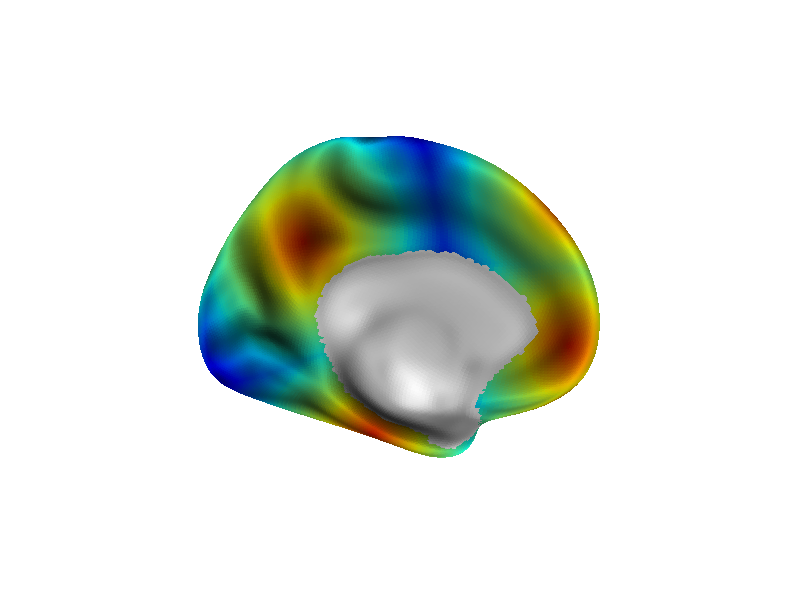

0
1
2
3
4
5
6


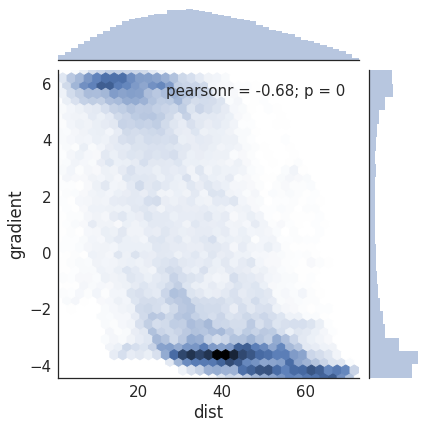

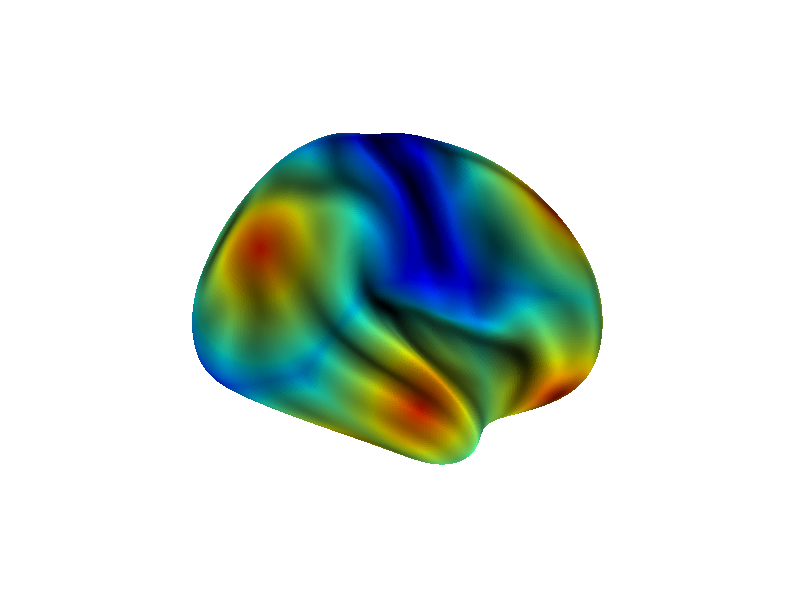

0
1
2
3
4
5
6
46.8107743764


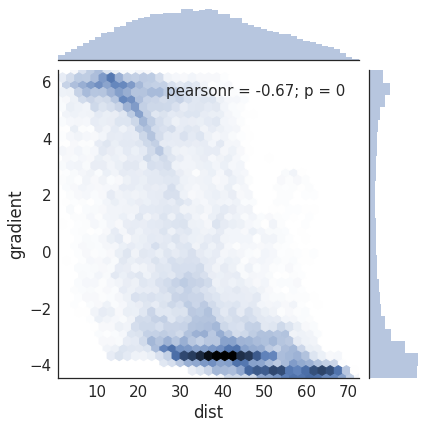

In [24]:
### 3# Distance from yeo7 DMN peaks

# In[ ]:


sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)


# In[ ]:


# Points derived from [include matlab script...]

DMNpeaksL = np.array([13335,28269,16243,29901,32148,20127,21508])-1
DMNpeaksR = np.array([28453,13354,16219,29760,32175,20229,26580])-1


# In[14]:


DMNdistL = doDist(DMNpeaksL, surfiL, cortL, sulcL, plotDist=True, zones=True, 
                  plots=emb[0:len(cortL),0])


# In[ ]:


DMNdistR = doDist(DMNpeaksR, surfiR, cortR, sulcR, plotDist=True, zones=True, 
                  plots=emb[len(cortL)::,0])


# # Macaque distance

# In[4]:


import scipy as sp
import scipy.io

atlases = {'rm': 0, 'lv': 1, 'fv': 3, 'b05': 4, 'bb47': 5, 'pht00': 7}

mat = sp.io.loadmat('gradient_data/macaque/f99_vertices_faces.mat')
surf = []
surf.append(np.array(mat['vertices'], dtype=np.float64))
surf.append(np.array(mat['faces'] - 1, dtype=np.int32))
sulc = nib.freesurfer.read_morph_data('gradient_data/macaque/rh.sulc') * -1
nodes = pd.read_csv('gradient_data/macaque/nodes_areaids.txt', '\t', header=-1)

mask = []
for x in xrange(0,len(surf[0])):
    mask.append(np.count_nonzero(nodes.T[x]))    
cort = np.squeeze(np.sort(np.where(np.array(mask) > 1)))
cort = np.array(cort, dtype=np.int32)

vertices, triangles = utils.surf_keep_cortex(surf, cort)


# In[7]:


import gdist 

# distMacacque(ids[range(24)], 'fv')
def distMacacque(num, alt):
    '''
    num = [280, 352, 302]
    alt = 'fv'
    '''
    src_label = []
    dist_vals = np.zeros((len(num), len(cort)))
    for n in xrange(0,len(num)):
        src = utils.translate_src(np.squeeze(np.where(nodes[atlases.get(alt)] == num[n])), cort)
        src_label.append(np.squeeze(np.where(nodes[atlases.get(alt)] == num[n])))
        dist_vals[n, :] = gdist.compute_gdist(vertices, triangles, source_indices=np.array(src, dtype=np.int32))
        del src    
    
    src_label = np.concatenate(src_label)
    src_label_cort = np.zeros(len(surf[0]))
    src_label_cort[src_label] = 1
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=src_label_cort, 
                       mask=np.where(src_label_cort != 0.)[0], 
                       bg_on_stat=True, azim=0, label=True, lenient=True)

    #plt.show() # JG_MOD
    plt.close() # JG_ADD

    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=src_label_cort, 
                       mask=np.where(src_label_cort != 0.)[0], 
                       bg_on_stat=True, azim=180, label=True, lenient=True)
    
    # plt.show() # JG_MOD
    plt.close()  # JG_ADD      
  
    zone = utils.recort((np.argsort(dist_vals, axis=0)[0, :] + 1.) / len(num), surf, cort)
    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=zone, 
                       mask=np.where(zone != 0.)[0], 
                       bg_on_stat=True, azim=0, label=True, lenient=True)
    
    #plt.show()  # JG_MOD
    plt.close() # JG_ADD

    plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=zone, 
                       mask=np.where(zone != 0.)[0], 
                       bg_on_stat=True, azim=180, label=True, lenient=True)

    #plt.show()   # JG_MOD
    plt.close()  # JG_ADD



    dist = utils.recort(np.sort(dist_vals, axis=0)[0, :], surf, cort)
    dret = dist.copy()
    
    print np.max(dist[np.isfinite(dist)])
    dist = dist - np.mean(dist[np.isfinite(dist)])
    f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist * -1, 
                       mask=np.where(zone != 0.)[0],
                       bg_on_stat=True, azim=0, label=True, lenient=True, symmetric_cbar = False, cmap=mymap)
    fname = 'gradient_data/figures/fig.macaque.dist.lat.png'
    f.savefig(fname, format='png', dpi=600, transparent=False)
    imageCrop(fname)  

    #plt.show() # JG_MOD
    plt.close() # JG_ADD



    f = plot_surf_stat_map(surf[0], surf[1], bg_map=sulc, stat_map=dist * -1, 
                       mask=np.where(zone != 0.)[0],
                       bg_on_stat=True, azim=180, label=True, lenient=True, symmetric_cbar = False, cmap=mymap)
    fname = 'gradient_data/figures/fig.macaque.dist.med.png'
    f.savefig(fname, format='png', dpi=600, transparent=False)
    imageCrop(fname)  


    #plt.show()  # JG_MOD
    plt.close() # JG_ADD

    
    return dret

def getIds(mat_name, names):
    
    lex = pd.read_csv('gradient_data/macaque/ids_areas.txt', ' ', header=-1)[1]

    ids = np.zeros(len(names))
    for i,y in enumerate(names):
        for n,x in enumerate(lex):
            if x == y:
                ids[i] = n
    return ids

def visDistMacaque(mat_name, ids_num, reverse=False):
        
    emb = np.load('gradient_data/conn_matrices/macaque_%s_emb.npy' % mat_name)
    names = np.load('gradient_data/conn_matrices/macaque_%s_names.npy' % mat_name)
    ids = getIds(mat_name, names)
    s = np.argsort(emb[:,0])
    ids = ids[s].copy()
    # dist_m, cort_ind = distMacacque(ids[len(ids)-4:len(ids)], mat_name)
    # print len(ids)
    if reverse==True:
        ids_num1 = range(len(ids)-ids_num,len(ids))
    else:
        ids_num1 = range(0,ids_num)
        
    dist_m = distMacacque(ids[ids_num1], mat_name)
    
    return dist_m, emb, names


# In[8]:


mat_name = 'bb47'
dist_m, emb, names = visDistMacaque(mat_name, 5, reverse=True)


# ## Macaque distance / embedding scatterplot

# In[23]:


dist_clusts = []
names = np.load('gradient_data/conn_matrices/macaque_%s_names.npy' % mat_name)
ids = getIds(mat_name, names)
emb = np.load('gradient_data/conn_matrices/macaque_%s_emb.npy' % mat_name)
s = np.argsort(emb[:,0])
ids = ids[s].copy()
for n in ids:
    dist_all = dist_m[np.where(nodes[atlases.get(mat_name)] == n)[0]]
    dist_all = dist_all[np.where(np.isfinite(dist_all))[0]]
    dist_clusts.append(np.mean(dist_all))
#print dist_clusts
#dist_clusts[np.where(np.isinf(dist_clusts))[0]]  = 0.

sns.set(style="white")
plt.figure(facecolor="white")

indx = np.argsort(np.argsort(emb[:,0] ))
plt.scatter(np.array(dist_clusts)[indx], emb[:,0], c='white', alpha=0)

labels = names.copy()
for label, x, y, n in zip(labels, np.array(dist_clusts)[indx], emb[:,0], xrange(len(labels))):
    plt.annotate(
        label[12::], 
        xy = (x, y), xytext = (0, 0),
        textcoords = 'offset points', ha = 'center', va = 'center', 
        bbox = dict(boxstyle = 'round,pad=.3', fc = 'black', alpha = 0.3), fontsize=12)

plt.savefig('gradient_data/figures/macaque_plot_comps_dist_%s.pdf' % mat_name)

# plt.show() # JG_MOD
plt.close() # JG_ADD


# In[ ]:

# Original notebook

In [14]:
% matplotlib inline 

import h5py, sys, io, numpy as np
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

In [111]:
def imageCrop(filename):

    from PIL import Image

    i1 = Image.open(filename)
    i2 = np.array(i1)
    i2[i2.sum(axis=2) == 255*4,:] = 0
    i3 = i2.sum(axis=2)
    x = np.where((i3.sum(axis=1) != 0) * 1)[0]
    y = np.where((i3.sum(axis=0) != 0) * 1)[0]

    result = Image.fromarray(i2[x.squeeze()][:,y.squeeze()])
    result.save(filename)

In [15]:
surfmL = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf')
surfiL = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.L.very_inflated.32k_fs_LR.surf')
surfL = []
surfL.append(np.array(surfmL[0]*0.3 + surfiL[0]*0.7))
surfL.append(surfmL[1])

surfmR = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf')
surfiR = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.R.very_inflated.32k_fs_LR.surf')
surfR = []
surfR.append(np.array(surfmR[0]*0.3 + surfiR[0]*0.7))
surfR.append(surfmR[1])

sulcL = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[0:32492]
sulcR = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[32492:32492*2]

res = nib.load('gradient_data/templates/hcp.tmp.lh.dscalar.nii').data
cortL = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))
res = nib.load('gradient_data/templates/hcp.tmp.rh.dscalar.nii').data
cortR = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))
cortLen = len(cortL) + len(cortR)
del res

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [16]:
emb = np.load('gradient_data/embedded/embedding_dense_emb.npy')

## Yeo7 networks 

In [25]:
yeo7L = nib.gifti.read('gradient_data/templates/hcp.RSN.L.gii').darrays[0].data
yeo7R = nib.gifti.read('gradient_data/templates/hcp.RSN.R.gii').darrays[0].data
yeo17L = nib.gifti.read('gradient_data/templates/hcp.RSN.L.gii').darrays[1].data
yeo17R = nib.gifti.read('gradient_data/templates/hcp.RSN.R.gii').darrays[1].data

/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  """Entry point for launching an IPython kernel.
/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  
/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  This is separate from the ipykernel package so we can avoid doi

In [26]:
yeo7 = np.concatenate((yeo7L[cortL], yeo7L[cortR]))
uniqueY = np.array(np.unique(yeo7), dtype=np.int32)[1::]
sz = len(uniqueY)
rsns={}
for c in range(sz):
    rsns['k'+str(int(c)+1)]=[]

r = []     
for x in range(sz):
    g = emb[np.where(yeo7 == uniqueY[x]),0]
    for y in g[0]:
        if y != 0:
            rsns['k'+str(int(x)+1)].append(float(y))
    r.append(np.mean(rsns['k'+str(int(x)+1)]))

ord = np.argsort(r)

plot_list=[]
for c in range(sz):    
    plot_list+=[np.squeeze(rsns['k'+str(ord[c]+1)])]

names=[]
for c in range(sz):
    names.append(str(int(ord[c])+1))

convertYeo7 = [2,5,6,0,4,1,3] 
cols7 = ((255,255,255),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
yeoCols = ListedColormap(cols,name='colormapYeo')

colors1 = list()
for i in xrange(0,len(ord)):
    colors1.append(tuple(cols[convertYeo7[ord[i]] + 1]))

IndexError: index 1702 is out of bounds for axis 0 with size 25

In [ ]:
height=10
sns.set_context('notebook', font_scale=1.8)
sns.axes_style("white")
sns.set_style("white")
sns.set_palette(colors1)

fig = plt.figure(figsize=(20,height))
ax = sns.boxplot(data=plot_list, saturation=0.5, orient='h', showfliers=False) #flierprops=None)#dict(marker='', markersize=0, 
                                                                               #color="white", markeredgecolor="white"))
ax.set_yticklabels('')
sns.axes_style("white")
sns.axlabel('Gradient Values','', fontsize=22)
plt.savefig('gradient_data/figures/yeo_dist_plot.pdf')
plt.savefig('gradient_data/figures/yeo_dist_plot.png')
plt.close(fig)

fig, axarr = plt.subplots(nrows=sz, ncols=1, figsize=(2*(20/sz),height))
data = datasets.fetch_atlas_yeo_2011(data_dir='gradient_data/templates/')
yeoV7 = nibabel.load(data.thick_7)
y = 0
for x in range(sz):
    yeoV7_1 = nibabel.Nifti1Image((yeoV7.get_data() == convertYeo7[ord[x]] + 1).astype(int), yeoV7.get_affine())     
    yeoCols = ListedColormap(cols[[0,convertYeo7[ord[x]] + 1]],name='colormapYeo')
    plotting.plot_glass_brain(yeoV7_1, axes=axarr[x], annotate=False, alpha=0.3, cmap=yeoCols, threshold=0.1, 
                          output_file='gradient_data/figures/yeo_brains.png')
    y += 1

from PIL import Image
i1 = Image.open('gradient_data/figures/yeo_dist_plot.png')
i2 = Image.open('gradient_data/figures/yeo_brains.png')
result = Image.new("RGBA", (np.shape(i1)[1]+50, np.shape(i1)[0]))
result.paste(i1, (120, 0))
result.paste(i2, (0, 0))
result.save('gradient_data/figures/Yeo7_Fig.png')

In [ ]:
from IPython.display import Image as im
im(filename='gradient_data/figures/Yeo7_Fig.png') 

In [ ]:
import sys
sys.path.append('gradient_data/src/')
from viz import *

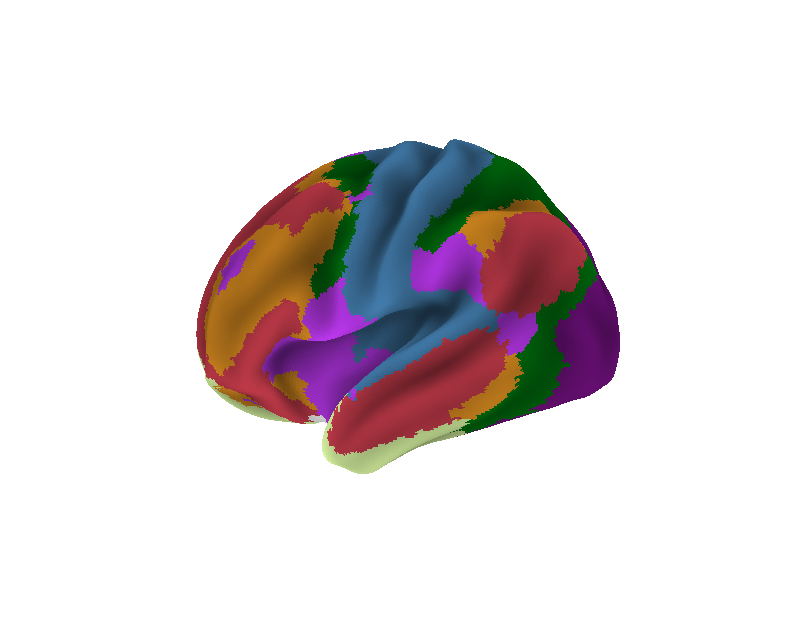

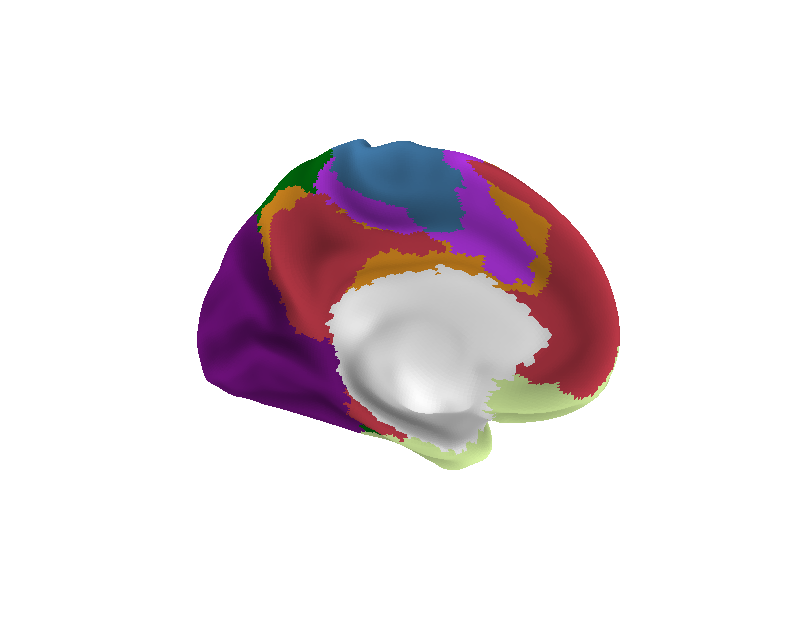

In [36]:
cols7 = ((255,255,255),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
yeoCols = ListedColormap(cols,name='colormapYeo')
y = yeo7L.copy()
for n, v in enumerate(uniqueY):
    y[yeo7L == v] = int(convertYeo7[n]) - 3
y[yeo7L == 37] = - 4
c = np.where([yeo17L != 37])[1]
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, mask=c, bg_on_stat=True, stat_map=y, azim=0, alpha=1, cmap=yeoCols, label=True, 
                       bg_scaling_factor=1.5)
plt.show()
f.savefig('gradient_data/figures/yeo7.lat.png')
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, mask=c, bg_on_stat=True, stat_map=y, azim=180, alpha=1, cmap=yeoCols, label=True, 
                       bg_scaling_factor=1.5)
plt.show()
f.savefig('gradient_data/figures/yeo7.med.png')

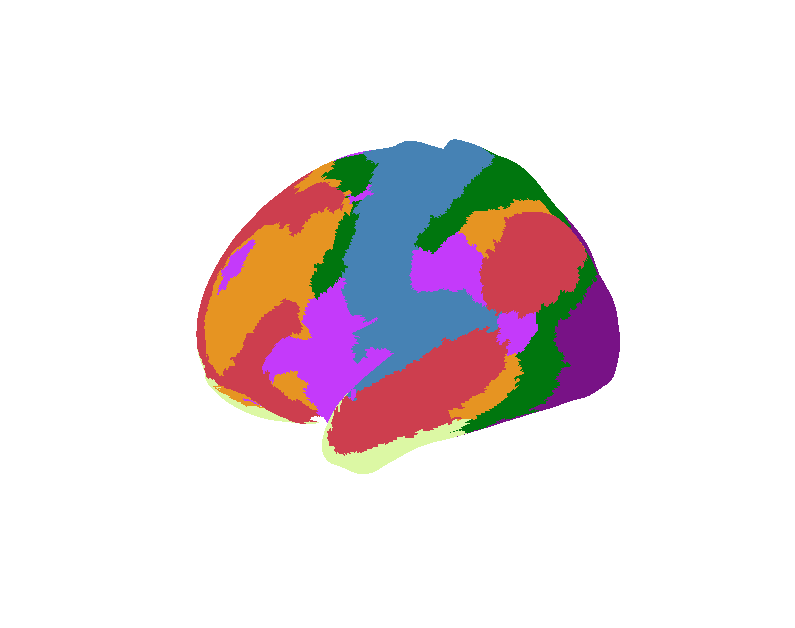

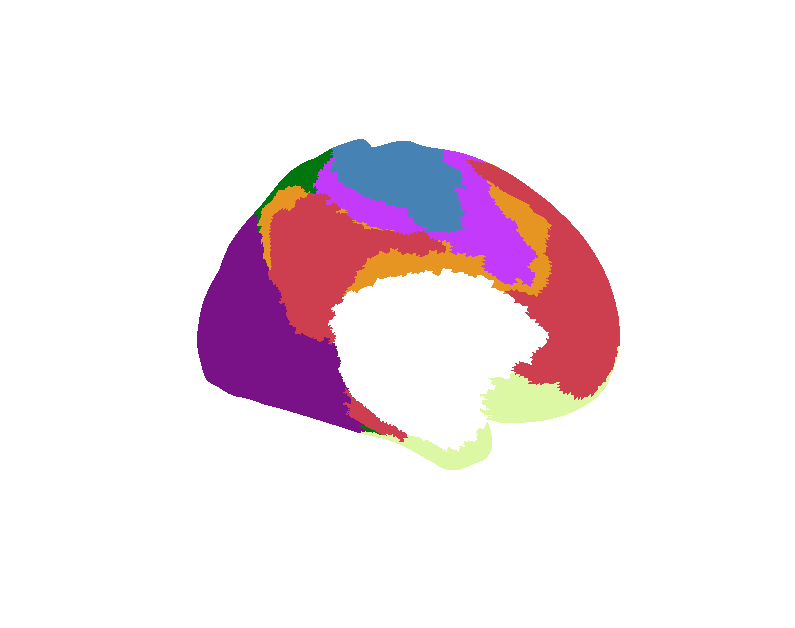

In [174]:
cols7 = ((255,255,255),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
yeoCols = ListedColormap(cols,name='colormapYeo')
y = yeo7L.copy()
for n, v in enumerate(uniqueY):
    y[yeo7L == v] = int(convertYeo7[n]) - 3
y[yeo7L == 37] = - 4
c = np.where([yeo17L != 37])[1]
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, mask=c, bg_on_stat=False, stat_map=y, azim=0, alpha=1, cmap=yeoCols, label=True)
fname = 'gradient_data/figures/yeo7.nobk.lat.png'
f.savefig(fname)
imageCrop(fname)
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, mask=c, bg_on_stat=False, stat_map=y, azim=180, alpha=1, cmap=yeoCols, label=True)
plt.show()
fname = 'gradient_data/figures/yeo7.nobk.med.png'
f.savefig(fname)
imageCrop(fname)

In [ ]:
cols = ((170,170,170),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = np.asarray(cols, dtype=float)/255
a = np.squeeze([cols[i] for i in y])


In [ ]:
import scipy.io
scipy.io.savemat('../topography/yeo7L.mat',{'a':a})

In [ ]:
# plot order on surface
cmap='pink'
y = yeo7L.copy()
ord1 = np.argsort(ord)
for n, v in enumerate(uniqueY):
    y[yeo7L == v] = int(ord1[n]) + 1 - 4
y[yeo7L == 37] = -4
c = np.where([yeo17L != 37])[1]
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, stat_map=y, cmap=cmap, mask=c, bg_on_stat=True, azim=0, alpha=1, label=True)
plt.show()
f.savefig('gradient_data/figures/yeo7.reord.lat.png')
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, stat_map=y, cmap=cmap, mask=c, bg_on_stat=True, azim=180, alpha=1, label=True)
plt.show()
f.savefig('gradient_data/figures/yeo7.reord.med.png')

In [ ]:
import surfdist as sd
from surfdist import viz, load, utils, surfdist
vertices, triangles = utils.surf_keep_cortex(surfmL, cortL)

In [118]:
aL = []
z0 = yeo7L[surfL[1]][:,0]
z1 = yeo7L[surfL[1]][:,1]
z2 = yeo7L[surfL[1]][:,2]

for n,i in enumerate(z0):
    if i != z1[n]:
        aL.append(surfL[1][n])
    if i != z2[n]:
        aL.append(surfL[1][n])
    if z1[n] != z2[n]:
        aL.append(surfL[1][n])
aL = np.unique(aL)

import gdist
aLp = []
for i in aL:
    b = np.where(cortL == i)[0]
    if b:
        aLp.append(b)
aLp = np.array(aLp).flatten()    
distLs = gdist.compute_gdist(vertices, triangles, source_indices=np.array(aLp, dtype=np.int32))

In [119]:
distL = np.zeros(32492)
distL[cortL] = distLs

3546


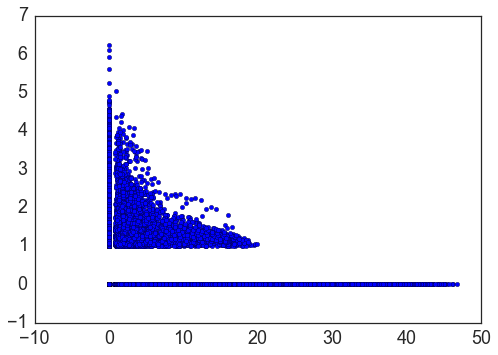

In [124]:
y = yeo7L.copy()
e = np.zeros(32492)
e[cortL] = emb[:len(cortL),0]
for n, v in enumerate(uniqueY):
    indx = np.where(yeo7L == v)[0]
    z = e[indx]
    zm = z - np.mean(z)    
    y[indx] = zm / np.std(zm)
y[yeo7L == 37] = 0
y[np.abs(y) < 1] = 0
print len(np.where(y > 0)[0])
plt.scatter(distL[incld],np.abs(y[incld]))
plt.show()

In [30]:
incld = np.where(surfiL[0][:,1] < 90)[0]

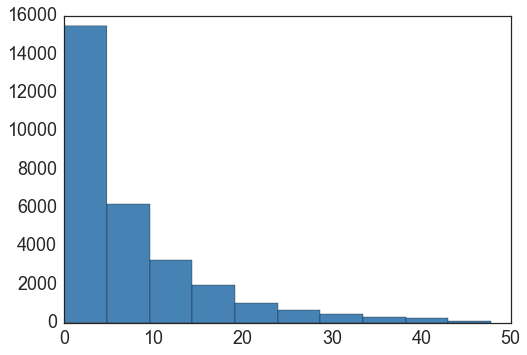

In [31]:
plt.hist(distL[cortL])
plt.show()

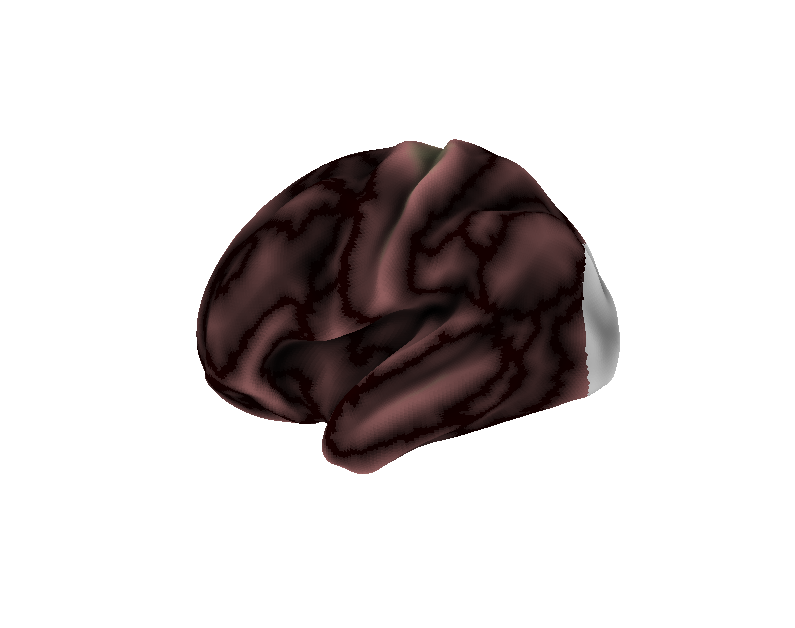

In [32]:
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, stat_map=distL, cmap=cmap, mask=incld, bg_on_stat=True, azim=0, alpha=1, label=True)
plt.show()

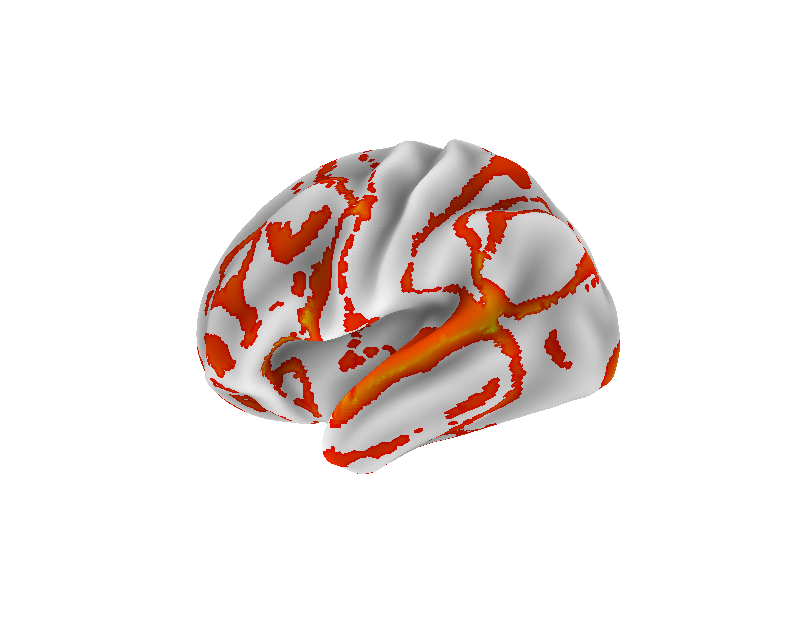

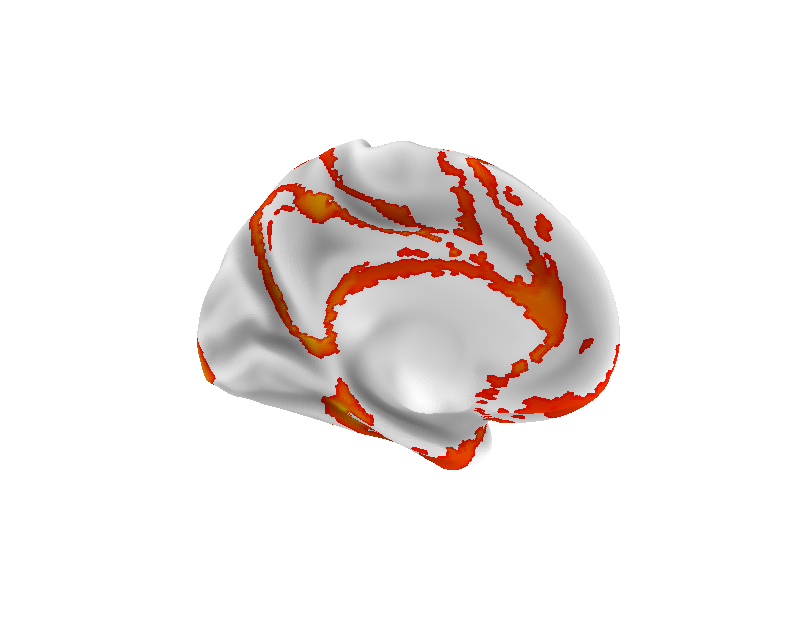

In [175]:
std_thr = 0
cmap='autumn'
import scipy.stats as stats

y = yeo7L.copy()
e = np.zeros(32492)
e[cortL] = emb[:len(cortL),0]
for n, v in enumerate(uniqueY):
    indx = np.where(yeo7L == v)[0]
    z = e[indx]
    # for percentile:
    #p = [stats.percentileofscore(z, a, 'rank') for a in z]
    #p = np.array(p)
    #p[np.where([(p1 > 25.0) & (p1 < 75.0) for p1 in p])] = 0
    #y[indx] = p
    
    zm = z - np.mean(z)      
    y[indx] = zm / np.std(zm)
        
y[np.abs(y) < 1.] = 0
y[yeo7L == 37] = 0
y = np.abs(y)

#y[y < std_thr] = 0
#y[aL] = 0 #std_thr * -1
#c = np.where([y > std_thr])[1]
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, stat_map=y, cmap=cmap, mask=np.where(y != 0)[0], 
                       lenient=True, bg_on_stat=True, azim=0, alpha=1, label=False, 
                       symmetric_cbar = False, bg_scaling_factor=1.5)
plt.show()
fname = 'gradient_data/figures/yeo7.outliers.lat.png'
f.savefig(fname)
imageCrop(fname)

f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, stat_map=y, cmap=cmap, mask=np.where(y != 0)[0], 
                       lenient=True, bg_on_stat=True, azim=180, alpha=1, label=False,
                       symmetric_cbar = False, bg_scaling_factor=1.5)
plt.show()
fname = 'gradient_data/figures/yeo7.outliers.med.png'
f.savefig(fname)
imageCrop(fname)

In [177]:
print np.min(y)

0.0


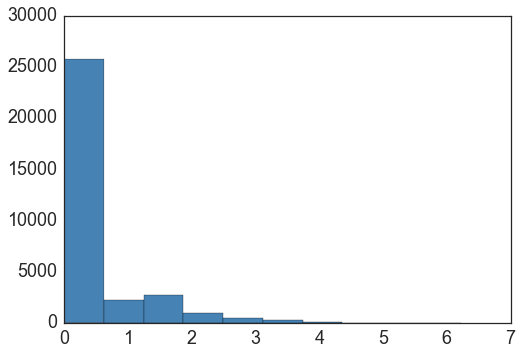

In [171]:
plt.hist(np.nonze(y))
plt.show()

In [92]:
a = [len(np.where(y == i)[0]) for i in np.unique(y)]
print a[1] + a[2]
print a[3] + a[4] + a[5]
print a[6] + a[7]
print a

10218
9991
9441
[2842, 5866, 4352, 3344, 3338, 3309, 2191, 7250]


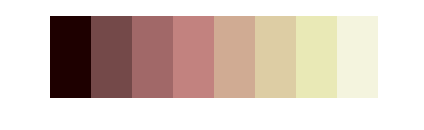

In [56]:
import matplotlib.pyplot as plt
num = 9
gradient = range(num)
for x in range(1):
    gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=cmap, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()
fig.savefig('gradient_data/figures/%s.colorbar.%i.png' % (cmap,num))

## Yeo17 networks

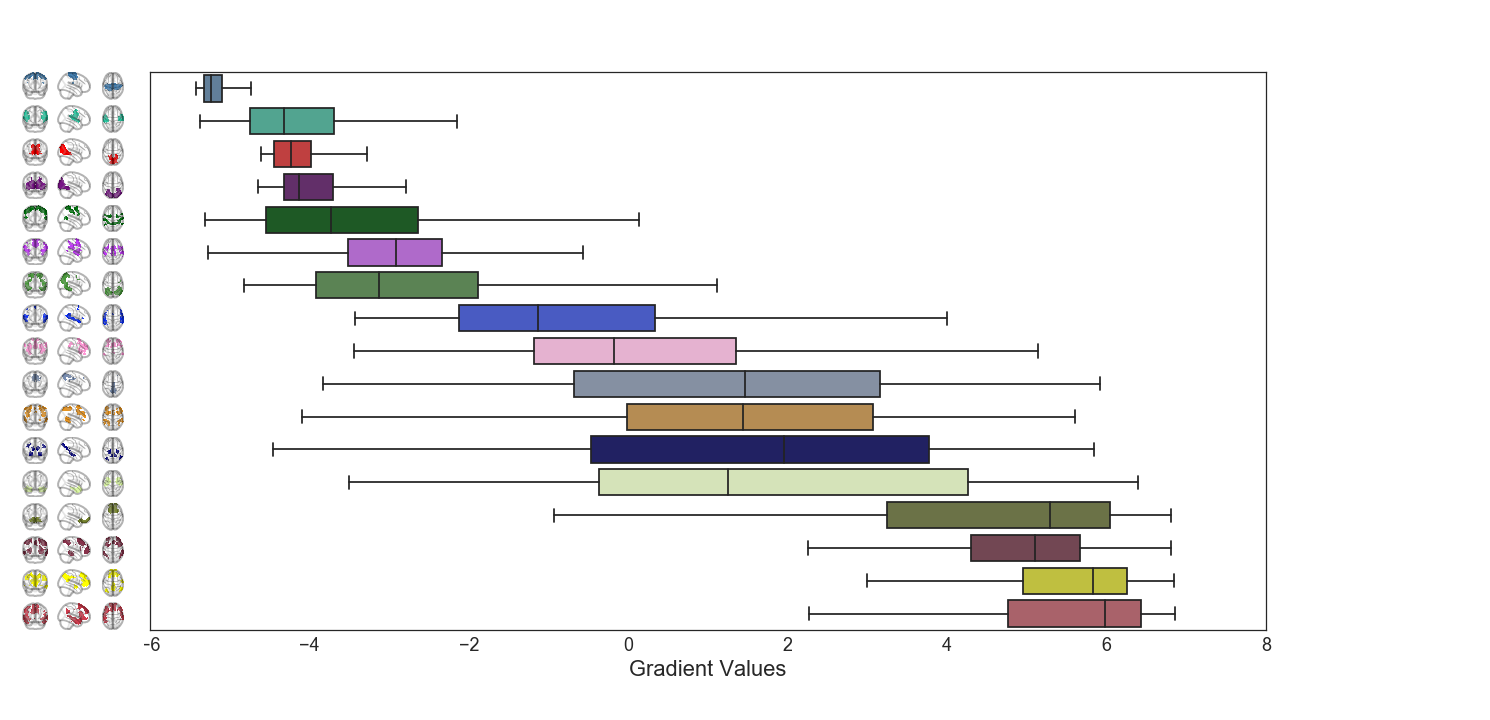

In [41]:
yeo17 = np.concatenate((yeo17L[cortL], yeo17L[cortR]))

uniqueY = np.array(np.unique(yeo17), dtype=np.int32)[1::]
sz = len(uniqueY)

rsns={}
for c in range(sz):
    rsns['k'+str(int(c)+1)]=[]

r = []     
for x in range(sz):
    g = emb[np.where(yeo17 == uniqueY[x])[0],0]
    for y in g:
        if y != 0:
            rsns['k'+str(int(x)+1)].append(float(y))
    r.append(np.mean(rsns['k'+str(int(x)+1)]))

ord = np.argsort(r)

plot_list=[]
for c in range(sz):    
    plot_list+=[np.squeeze(rsns['k'+str(ord[c]+1)])]

names=[]
for c in range(sz):
    names.append(str(int(ord[c])+1))

convertYeo17 = [1,15,5,11,9,4,12,16,14,0,3,8,10,2,7,6,13]

cols17 = ((255,255,255),
        (120,  18, 134 ),
        (255,   0,   0 ),
        (70 ,130, 180  ),
        (42, 204, 164  ),
        (74 ,155 , 60  ),
        (0 ,118,  14  ),
        (196 , 58, 250 ),
        (255 ,152, 213 ),
        (220 ,248, 164 ),
        (122, 135 , 50 ),
        (119 ,140 ,176 ),
        (230 ,148,  34 ),
        (135,  50 , 74 ),
        (12  ,48, 255  ),
        (0 ,  0, 130  ),
        (255, 255,   0 ),
        (205 , 62 , 78 ))

cols = np.asarray(cols17, dtype=np.float64)/255.
yeoCols = ListedColormap(cols,name='colormapYeo')

colors1 = []
for i in xrange(0,len(ord)):
    colors1.append(cols[convertYeo17[ord[i]] + 1])

height=10
sns.set_context('notebook', font_scale=1.8)
sns.axes_style("white")
sns.set_palette(colors1)

fig = plt.figure(figsize=(20,height))
ax = sns.boxplot(data=plot_list, saturation=0.5, orient='h', showfliers=False) #flierprops=dict(marker='+', markersize=2, color="gray", markeredgecolor="gray")
ax.set_yticklabels('')
sns.axlabel('Gradient Values','', fontsize=22)
plt.savefig('gradient_data/figures/yeo17_dist_plot_dist.png')
plt.savefig('gradient_data/figures/yeo17_dist_plot_dist.pdf')
plt.close(fig)

fig, axarr = plt.subplots(nrows=sz, ncols=1, figsize=(2*(20/sz),height))
data = datasets.fetch_atlas_yeo_2011(data_dir='gradient_data/templates/')
yeoV17 = nibabel.load(data.thick_17)
y = 0
for x in range(sz):
    yeoV17_1 = nibabel.Nifti1Image((yeoV17.get_data() == convertYeo17[ord[x]] + 1).astype(int), yeoV17.get_affine()) 
    yeoCols = ListedColormap(cols[[0,convertYeo17[ord[x]] + 1]],name='colormapYeo')
    plotting.plot_glass_brain(yeoV17_1, axes=axarr[x], annotate=False, alpha=0.3, cmap=yeoCols, threshold=0.1, 
                          output_file='gradient_data/figures/yeo17_brains_dist.png')
    y += 1

from PIL import Image
i1 = Image.open('gradient_data/figures/yeo17_dist_plot_dist.png')
i2 = Image.open('gradient_data/figures/yeo17_brains_dist.png')
result = Image.new("RGBA", (np.shape(i1)[1]+50, np.shape(i1)[0]))
result.paste(i1, (-30, 0))
result.paste(i2, (0, 0))
result.save('gradient_data/figures/Yeo17_Fig_dist.png')

from IPython.display import Image as im
im(filename='gradient_data/figures/Yeo17_Fig_dist.png') 

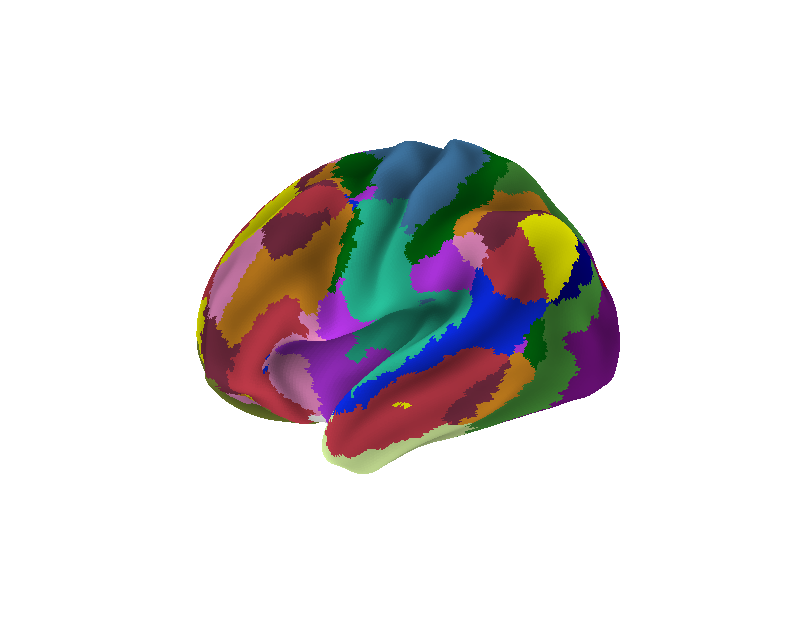

In [64]:
cols17 = ((255,255,255),
        (120,  18, 134 ),
        (255,   0,   0 ),
        (70 ,130, 180  ),
        (42, 204, 164  ),
        (74 ,155 , 60  ),
        (0 ,118,  14  ),
        (196 , 58, 250 ),
        (255 ,152, 213 ),
        (220 ,248, 164 ),
        (122, 135 , 50 ),
        (119 ,140 ,176 ),
        (230 ,148,  34 ),
        (135,  50 , 74 ),
        (12  ,48, 255  ),
        (0 ,  0, 130  ),
        (255, 255,   0 ),
        (205 , 62 , 78 ))

cols = np.asarray(cols17, dtype=np.float64)/255.
yeoCols = ListedColormap(cols,name='colormapYeo')
# use ord to create plot on surface
y = yeo17L.copy()
for n, v in enumerate(uniqueY):
    y[yeo17L == v] = int(convertYeo17[n]) - 8
y[yeo17L == 37] = - 9
c = np.where([yeo17L != 37])[1]
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, mask=c, stat_map=y, bg_on_stat=True, azim=0, alpha=1, cmap=yeoCols, label=True, 
                       bg_scaling_factor=1.5)
plt.show()
f.savefig('gradient_data/figures/yeo17.lat.png')
imageCrop('gradient_data/figures/yeo17.mat.png')
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, mask=c, stat_map=y, bg_on_stat=True, azim=180, alpha=1, cmap=yeoCols, label=True, 
                       bg_scaling_factor=1.5)
plt.show()
f.savefig('gradient_data/figures/yeo17.med.png')
imageCrop('gradient_data/figures/yeo17.med.png')

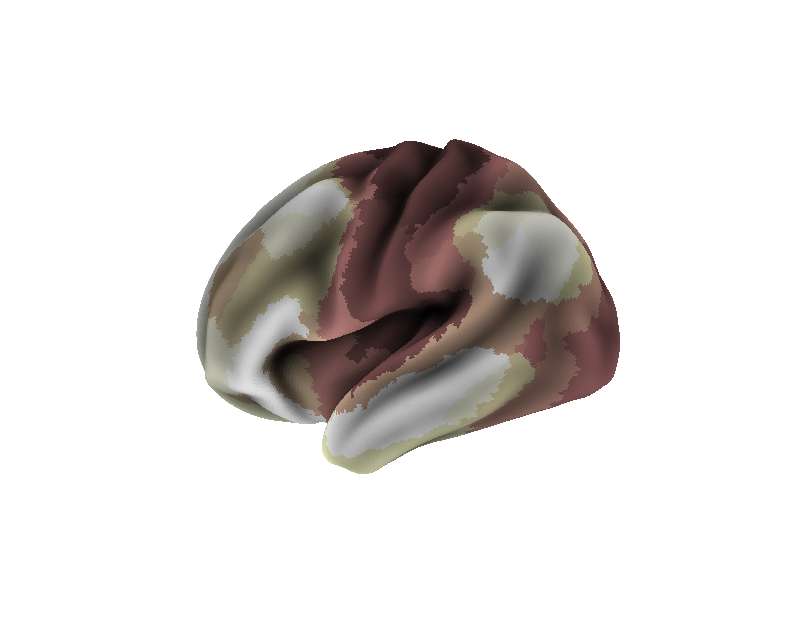

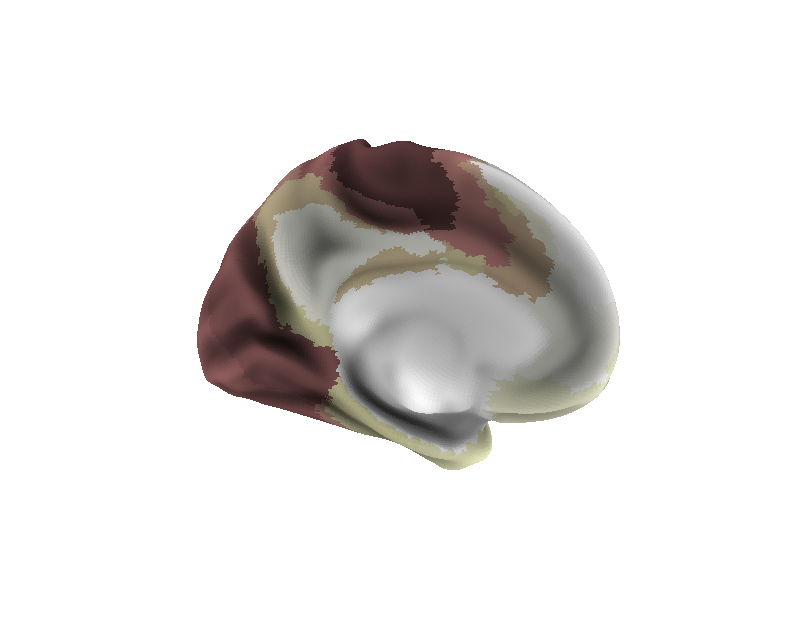

In [40]:
y = yeo17L.copy()
ord1 = np.argsort(ord)
for n, v in enumerate(uniqueY):
    y[yeo17L == v] = int(ord1[n]) + 1 - 8
y[yeo17L == 37] = -8
c = np.where([yeo17L != 37])[1]
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, stat_map=y, mask=c, cmap='pink', bg_on_stat=True, azim=0, alpha=1, label=True)
plt.show()
f.savefig('gradient_data/figures/yeo17.reord.lat.png')
f = plot_surf_stat_map(surfL[0], surfL[1], bg_map=sulcL, stat_map=y, mask=c, cmap='pink', bg_on_stat=True, azim=180, alpha=1, label=True)
plt.show()
f.savefig('gradient_data/figures/yeo17.reord.med.png')

# Smith 2009 maps

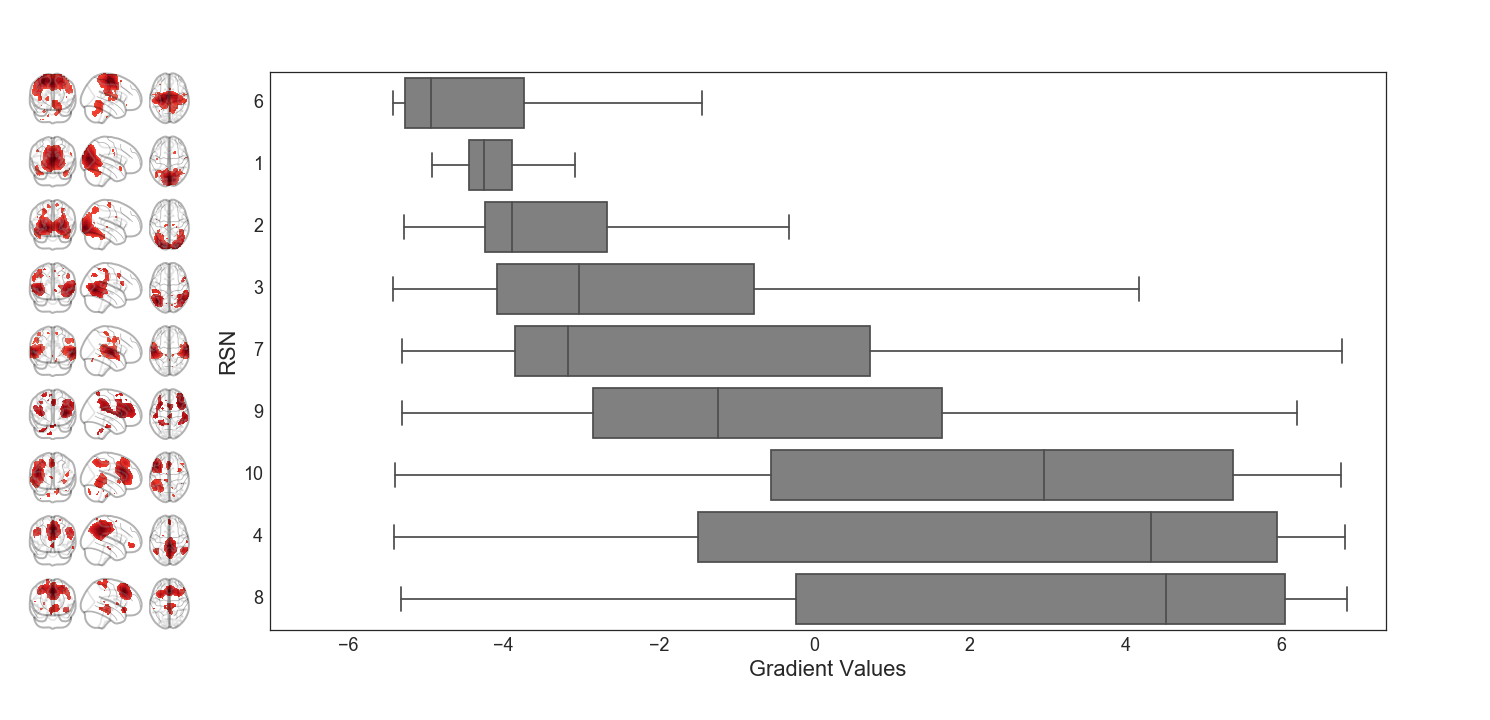

In [113]:
embedS = nib.load('gradient_data/embedded/volumes/volume.cort.0.nii.gz')
e = nib.Nifti1Image(embedS.get_data(), embedS.get_affine())
data = datasets.fetch_atlas_smith_2009(data_dir='gradient_data/templates/')
data_bm10 = nib.load(data.bm10)

thr = 3.1
data_smith = data_bm10
sz = np.shape(data_smith.get_data())[3]

rsns={}
for c in range(sz):
    rsns['k'+str(int(c)+1)]=[]
  
r = []     
for x in range(sz):
    d = nib.Nifti1Image(data_smith.get_data()[:,:,:,x], data_smith.get_affine())   
    g = e.get_data()[np.where((d.get_data() > thr) & (e.get_data() != 0))]    
    for y in g:
        if y != 0:
            rsns['k'+str(int(x)+1)].append(float(y))
    r.append(np.mean(rsns['k'+str(int(x)+1)]))

ord = np.argsort(r)

plot_list=[]
for c in range(sz):
    if data_smith != data_bm10 or ord[c] != 4:
        plot_list+=[np.squeeze(rsns['k'+str(ord[c]+1)])]

names=[]
for c in range(sz):
    if data_smith != data_bm10 or ord[c] != 4:
        names.append(str(int(ord[c])+1))

height=10
sns.set_context('notebook', font_scale=1.8)
fig = plt.figure(figsize=(20,height))

ax = sns.boxplot(data=plot_list, saturation=0.5, color='gray', orient='h', 
                 flierprops=dict(marker='+', markersize=2, color="gray", markeredgecolor="gray"))
ax.set_yticklabels(names)
#ax.set_xlim([np.min(e.get_data()), np.max(e.get_data())])
ax.set_xlim([-7, np.max(e.get_data())+0.5])
sns.axlabel('Gradient Values','RSN', fontsize=22)
plt.savefig('gradient_data/figures/smith_dist_plot.png')
plt.close(fig)
 
# Make smith brains:    
if data_smith == data_bm10:
    fig, axarr = plt.subplots(nrows=sz-1, ncols=1, figsize=(1.5*(20/sz),height))
else:
    fig, axarr = plt.subplots(nrows=sz, ncols=1, figsize=(1.5*(20/sz),height))
    
y = 0
for x in range(sz):
    if data_smith != data_bm10 or ord[x] != 4:
        d = nib.Nifti1Image(data_smith.get_data()[:,:,:,ord[x]], data_smith.get_affine())
        plotting.plot_glass_brain(d, axes=axarr[y], annotate=False, alpha=0.3, threshold=thr, cmap='Reds',
                              output_file='gradient_data/figures/smith_brains.png')
        y += 1

        
from PIL import Image

i1 = Image.open('gradient_data/figures/smith_dist_plot.png')
i2 = Image.open('gradient_data/figures/smith_brains.png')

result = Image.new("RGBA", (np.shape(i1)[1]+50, np.shape(i1)[0]))

result.paste(i1, (90, 0))
result.paste(i2, (0, 0))
result.save('gradient_data/figures/Smith_Fig.png')

from IPython.display import Image as im
im(filename='gradient_data/figures/Smith_Fig.png') 